## Importing the Libraries and the Dataset 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
data=pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


From the dataset preview, Selling_Price is the dependent variable and the rest are independent variables

## Exploratory Data Analysis

In [3]:
data.shape

(301, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing values in the dataset

## Checking cardinality of independent categorical variables in the dataset

In [6]:
print('Unique elements in Seller_Type are',data['Seller_Type'].unique())
print('Unique elements in Fuel_Type are',data['Fuel_Type'].unique())
print('Unique elements in Transmission are',data['Transmission'].unique())
print('Unique elements in Owner are',data['Owner'].unique())
print('Unique elements in Year are',data['Year'].unique())

Unique elements in Seller_Type are ['Dealer' 'Individual']
Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are [0 1 3]
Unique elements in Year are [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [7]:
print('Unique elements in Car_Name are',data['Car_Name'].nunique())
#98 unique elements 
#so, rather than encoding it, we can just drop this columbn as it doesn' make sense

Unique elements in Car_Name are 98


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Feature Engineering

Dropping the Car_Name Column

In [9]:
dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Let's make a feature variable 'Present_Year' which has all the element values as 2025. On subtracting 'Present_Year' and 'Year', we can make another feature variable as 'Number_of_Years_Old', which gives us idea about how old the car is.  

In [10]:
dataset['Number_of_Years_Old']=2025 - dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


So, we can now safely drop 'Year' and 'Present_Year' columns 

In [11]:
dataset.drop(labels=['Year'],axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


## Data Visualization

In [12]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


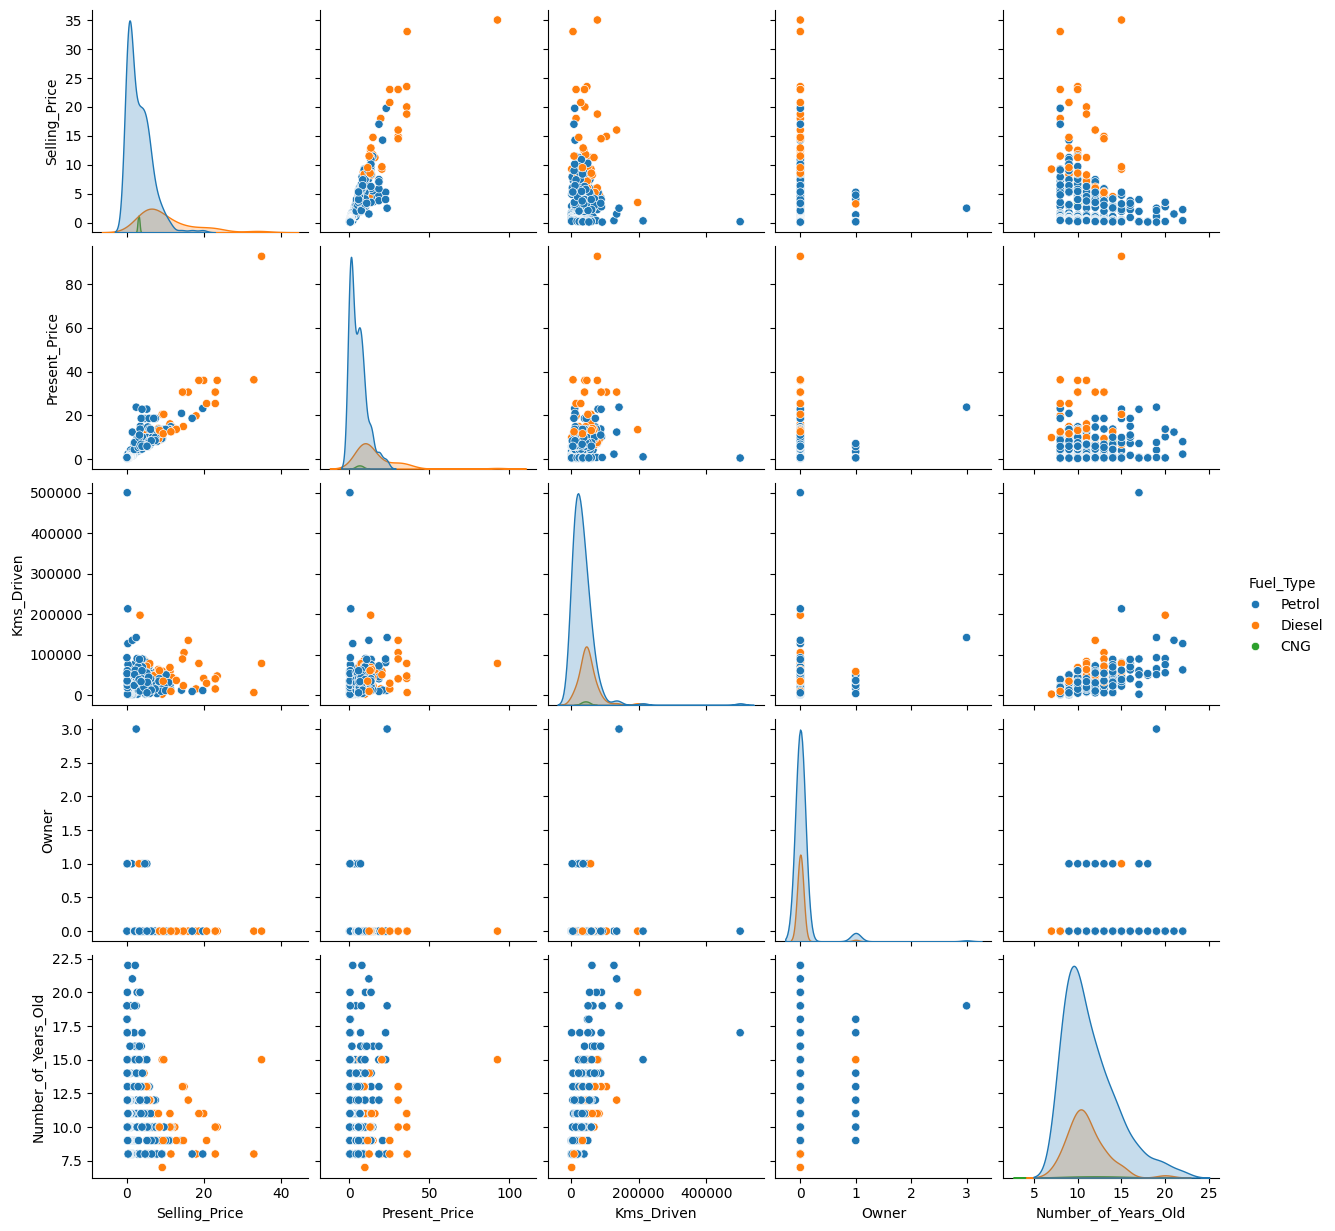

In [13]:
sns.pairplot(dataset,hue='Fuel_Type',diag_kind='kde')

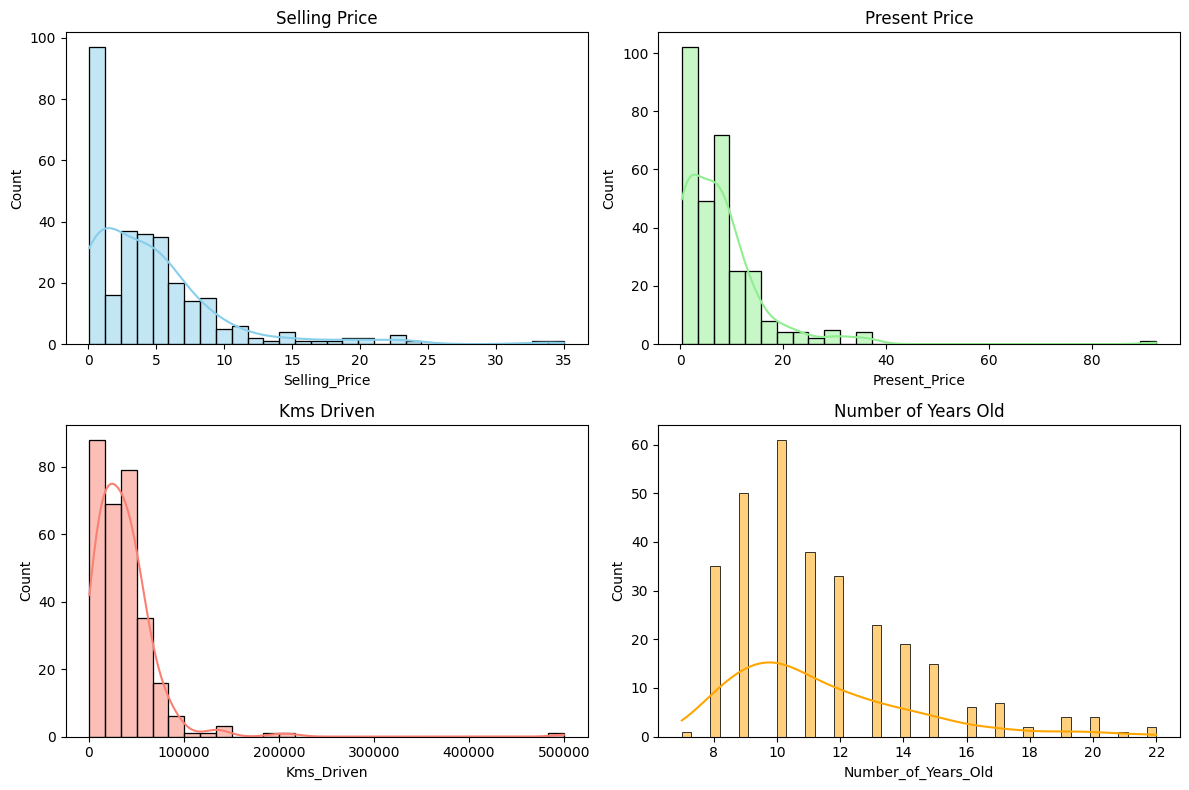

In [14]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Selling_Price with KDE
sns.histplot(data=dataset, x='Selling_Price', bins=30, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Selling Price')

# Present_Price with KDE
sns.histplot(data=dataset, x='Present_Price', bins=30, kde=True, color='lightgreen', ax=axs[0, 1])
axs[0, 1].set_title('Present Price')

# Kms_Driven with KDE
sns.histplot(data=dataset, x='Kms_Driven', bins=30, kde=True, color='salmon', ax=axs[1, 0])
axs[1, 0].set_title('Kms Driven')

# Number_of_Years_Old with KDE
sns.histplot(data=dataset, x='Number_of_Years_Old', bins=50, kde=True, color='orange', ax=axs[1, 1])
axs[1, 1].set_title('Number of Years Old')

# Adjust spacing
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\2057889326.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Fuel_Type', ax=axs[0, 0], palette='pastel')
C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\2057889326.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Seller_Type', ax=axs[0, 1], palette='pastel')
C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\2057889326.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Transmission', ax=axs[1, 0], palette='pastel')
C:\Users\Dell\

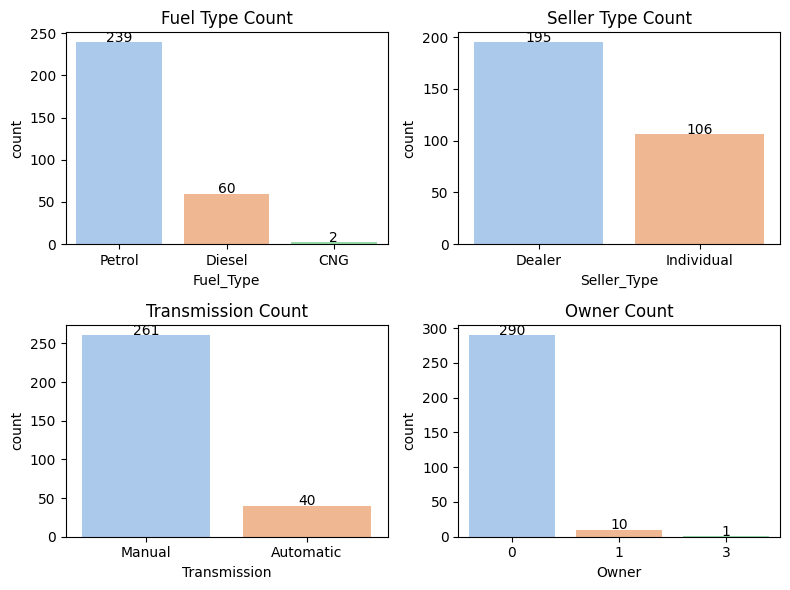

In [15]:
# Create 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(8,6))

# Define a function to add count labels on top
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
                int(height), ha="center", fontsize=10)

# Plot 1: Fuel_Type
sns.countplot(data=dataset, x='Fuel_Type', ax=axs[0, 0], palette='pastel')
axs[0, 0].set_title('Fuel Type Count')
add_labels(axs[0, 0])

# Plot 2: Seller_Type
sns.countplot(data=dataset, x='Seller_Type', ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('Seller Type Count')
add_labels(axs[0, 1])

# Plot 3: Transmission
sns.countplot(data=dataset, x='Transmission', ax=axs[1, 0], palette='pastel')
axs[1, 0].set_title('Transmission Count')
add_labels(axs[1, 0])

# Plot 4: Owner
sns.countplot(data=dataset, x='Owner', ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Owner Count')
add_labels(axs[1, 1])

# Improve layout
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\3889188653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset,x='Number_of_Years_Old',palette='Set2')


Text(0.5, 1.0, 'Number Of Years Old Value Counts')

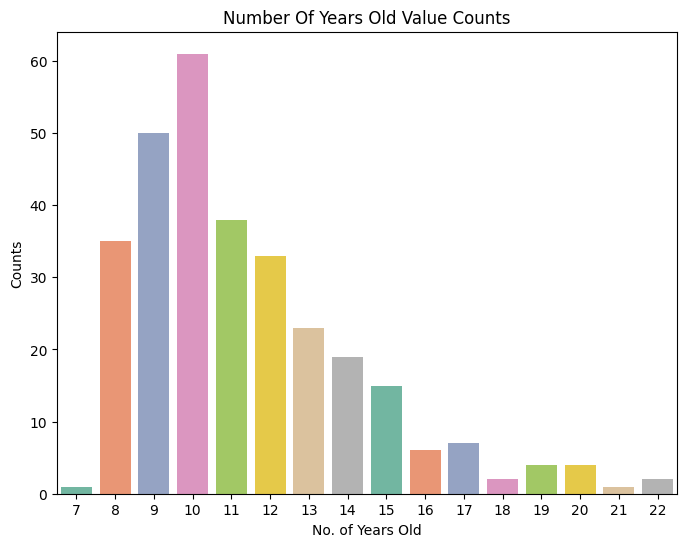

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=dataset,x='Number_of_Years_Old',palette='Set2')
plt.xlabel('No. of Years Old')
plt.ylabel('Counts')
plt.title('Number Of Years Old Value Counts')

## Encoding the Categorical Variables

In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
# checking the distribution of categorical data
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [19]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=dataset[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=dataset[['Seller_Type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=dataset[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)

dataset.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [20]:
dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_Years_Old', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [21]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


Now, the encoding has been done 

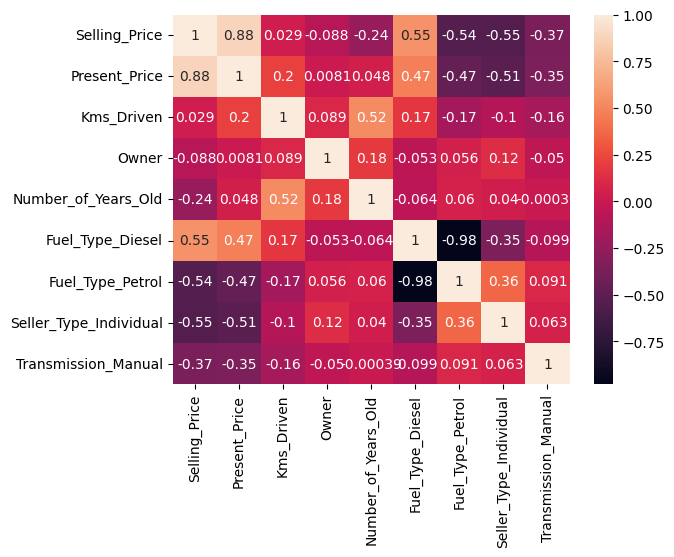

In [22]:
# Dataset Correlation
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [23]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [24]:
x=dataset.iloc[:,1:]
y=dataset['Selling_Price']

[0.37752604 0.03916015 0.00065466 0.07654788 0.2259107  0.01302217
 0.12801535 0.13916304]


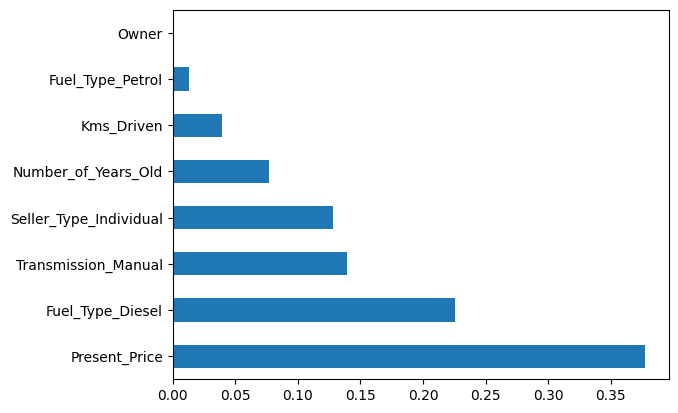

In [25]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

'Owner' has zero feature importance i.e. nil on the dependent variable, 'Selling_Price'

## Model Building and Training

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Decision Tree Regressor

Decision Tree Score on Training set is 1.0
Decision Tree Score on Test Set is 0.9202815383374512
Mean Absolute Error: 0.8102197802197801
Mean Squared Error: 2.3840648351648355
RMSE: 1.5440417206684653
The r2_score is 0.9202815383374512


C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\4224476008.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


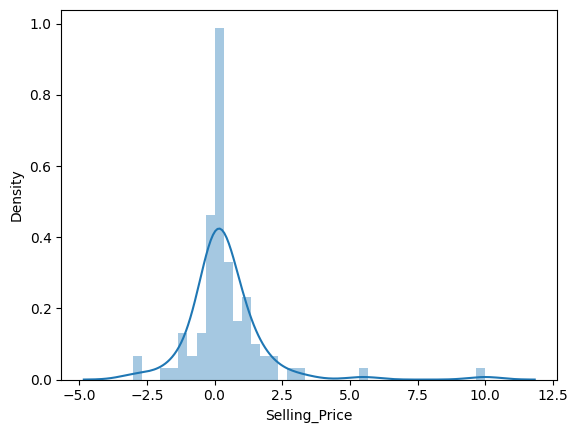

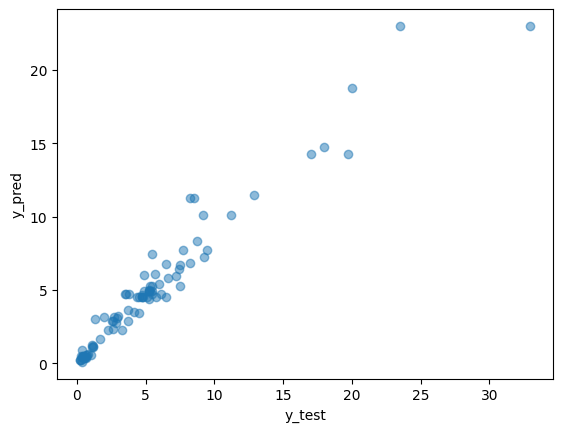

In [32]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [53]:
#Hyperparameter tuning
# Define the model
dt = DecisionTreeRegressor(random_state=42)

# Define parameter grid
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Grid Search
dt_grid = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Best estimator and score
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best CV R2 Score:", dt_grid.best_score_)

# Predict using best estimator
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(X_test)

Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV R2 Score: 0.876890479001364


#### Random Forest Regressor

Random Forest Score on Training set is 0.9786462746411071
Random Forest Score on Test Set is 0.8662562500621133
Mean Absolute Error: 0.9550692307692316
Mean Squared Error: 3.999748170000003
RMSE: 1.9999370415090578
The r2_score is 0.8662562500621133


C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\654318982.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


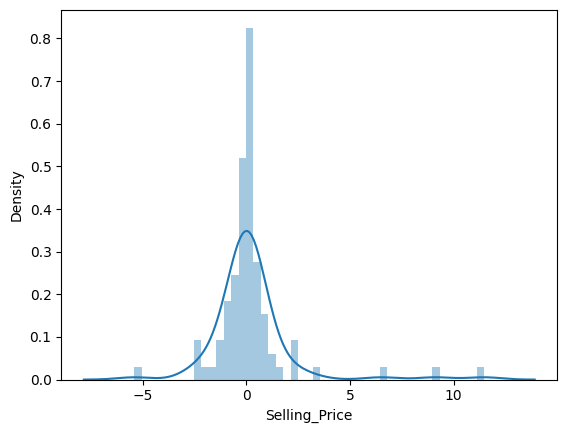

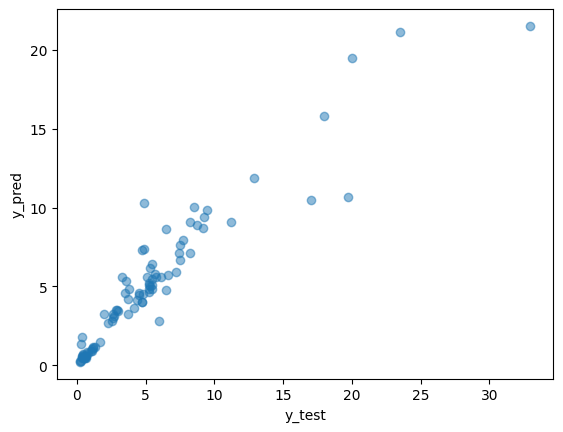

In [36]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Voting Regressor

##### Voting Regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset to average the individual predictions to form a final prediction.

Voting Regresssor Score on Training set is 0.9959991538293936
Voting Regresssor Score on Test Set is 0.9073613387951524
[0.96766471 0.77488061 0.85870624 0.91615824 0.94212582]
Accuracy: 89.19 %
Standard Deviation: 6.88 %
Mean Absolute Error: 0.7857071428571426
Mean Squared Error: 2.7704570553571424
RMSE: 1.664469001020188
The r2_score is 0.9073613387951524


C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\4051451342.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


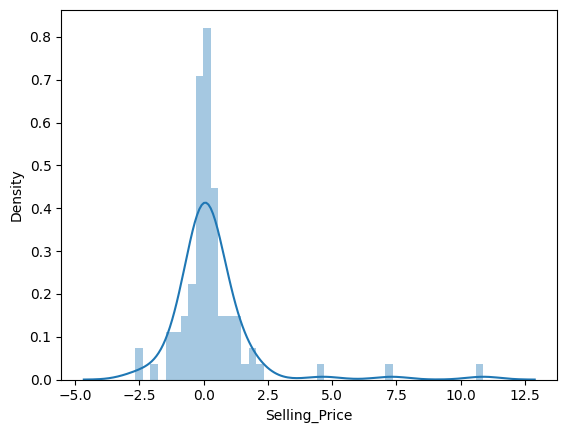

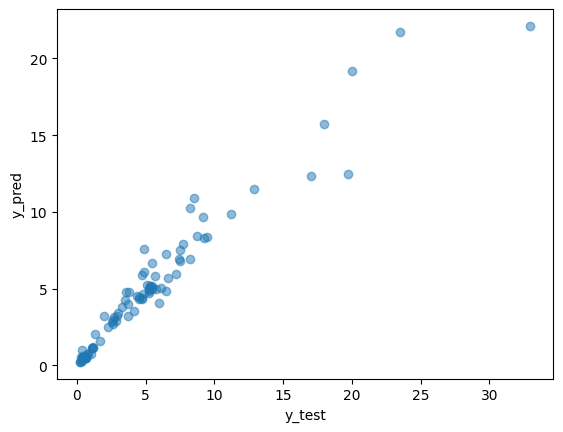

In [94]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('DecisionTree', dt_reg), ('RandomForestRegressor', rf_reg)])
vot_reg.fit(X_train, y_train)
y_pred=vot_reg.predict(X_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(X_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

So, the XGBoost Regressor gave us best scores on the Training Dataset

### Linear Regression

Linear Regression Score on Training set: 0.8926207626208046
Linear Regression Score on Test set: 0.8517983059778264
Mean Absolute Error: 1.2426713915033707
Mean Squared Error: 4.432128265667617
Root Mean Squared Error: 2.105262042043132
R² Score: 0.8517983059778264


C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\1084701813.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred_lr)


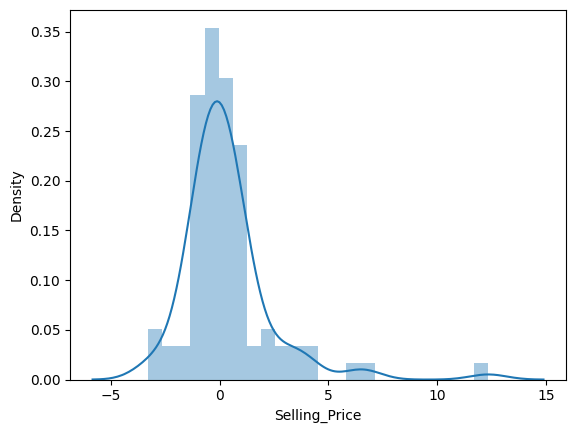

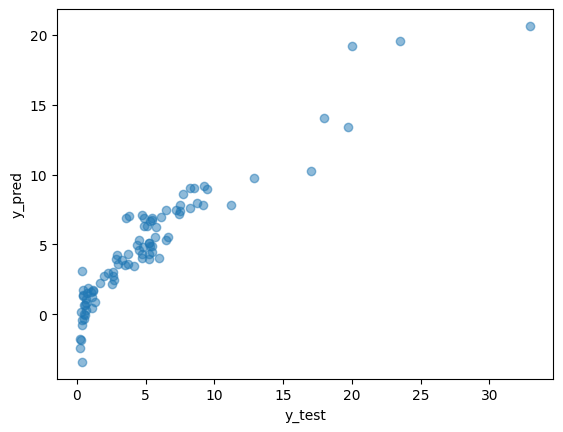

In [49]:
from sklearn.linear_model import LinearRegression

# Step 1: Initialize the model
lr = LinearRegression()

# Step 2: Train the model
lr.fit(X_train, y_train)

# Step 3: Predict
y_pred_lr = lr.predict(X_test)

# Step 4: Evaluate the model
print("Linear Regression Score on Training set:", lr.score(X_train, y_train))
print("Linear Regression Score on Test set:", lr.score(X_test, y_test))

mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


sns.distplot(y_test-y_pred_lr)
plt.show()

plt.scatter(y_test, y_pred_lr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Gradient Boosting

GradientBoostingRegressor Score on Training set: 0.9976851269193134
GradientBoostingRegressor Score on Test set: 0.9323048172489539
Mean Absolute Error: 0.7125946494845585
Mean Squared Error: 2.024495974219809
Root Mean Squared Error: 1.4228478394472859
R² Score: 0.9323048172489539


C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\1139696518.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred_gbr)


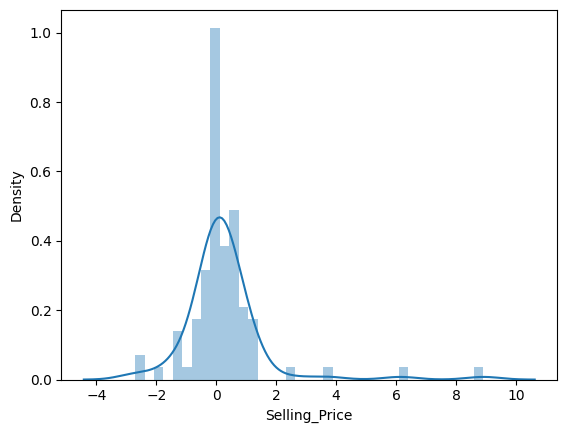

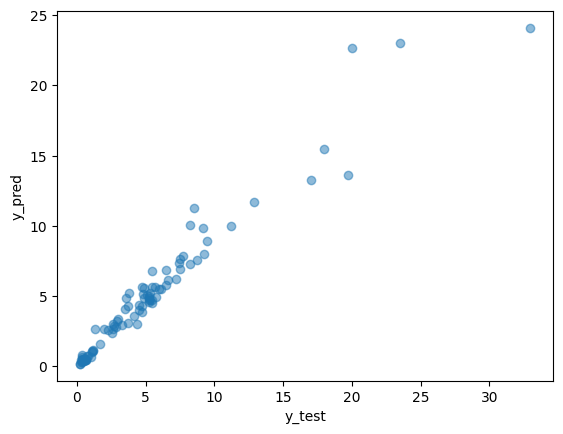

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
print("GradientBoostingRegressor Score on Training set:", gbr_model.score(X_train, y_train))
print("GradientBoostingRegressor Score on Test set:", gbr_model.score(X_test, y_test))

mae = mean_absolute_error(y_test, y_pred_gbr)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred_gbr)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred_gbr)
print("R² Score:", r2)

sns.distplot(y_test-y_pred_gbr)
plt.show()

plt.scatter(y_test, y_pred_gbr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### XG Boost

Linear Regression Score on Training set: 0.998660249508535
Linear Regression Score on Test set: 0.9030229076791135


C:\Users\Dell\AppData\Local\Temp\ipykernel_17984\1804687776.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred_xgb)


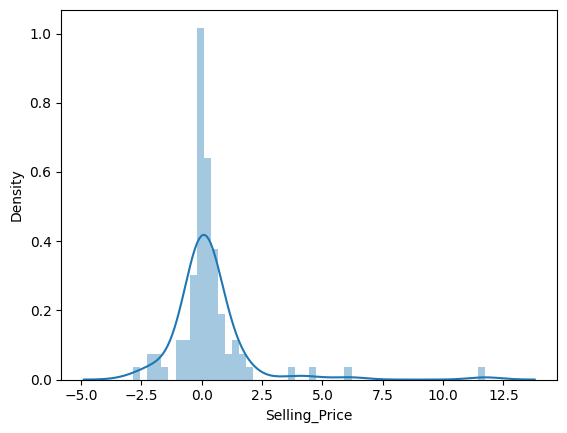

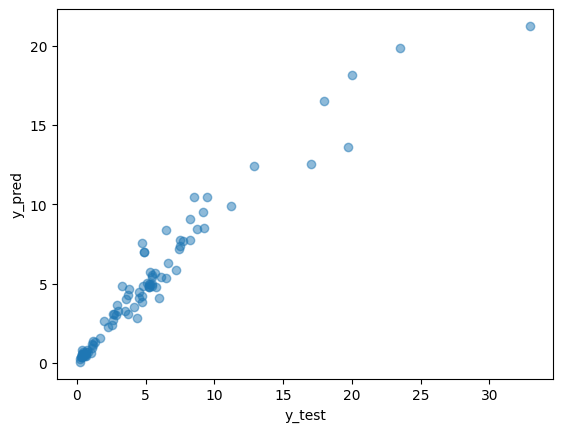

In [47]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize model with common hyperparameters
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)
print("Linear Regression Score on Training set:", xgb_model.score(X_train, y_train))
print("Linear Regression Score on Test set:", xgb_model.score(X_test, y_test))

sns.distplot(y_test-y_pred_xgb)
plt.show()

plt.scatter(y_test, y_pred_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Building a Predictive system

In [57]:
x.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,11,False,True,False,True
1,9.54,43000,0,12,True,False,False,True
2,9.85,6900,0,8,False,True,False,True
3,4.15,5200,0,14,False,True,False,True
4,6.87,42450,0,11,True,False,False,True


In [66]:
input_data=(9.54,43000,0,12,1,0,0,1)	

In [67]:
# change the input data to numpy array
input=np.asarray(input_data)

# reshape the numpy array
input_pred=input.reshape(1,-1)

In [68]:
model_prediction=gbr_model.predict(input_pred)
print(model_prediction)

[5.23101557]


C:\Users\Dell\Desktop\jupyter_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Dump the model selected as a Pickle File

In [99]:
import pickle
pickle.dump(gbr_model, open("Gradient_boosting.pkl", "wb"))

# load model from file
model = pickle.load(open("Gradient_boosting.pkl", "rb"))

model.predict([[4.15, 5300, 0, 14, 0, 1, 0, 1]])

C:\Users\Dell\Desktop\jupyter_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([2.83180045])